### Mercedes-Benz Greener Manufacturing
From Kaggle

In [1]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### EDA: 

In [3]:
df_train.shape, df_test.shape

((4209, 378), (4209, 377))

In [4]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

### Check for Null Values: 

In [6]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [7]:
NANs = pd.concat([df_train.isnull().sum()],axis=1,keys=['Count of NANs'])
NANs[NANs.sum(axis=1)>0]

,Count of NANs


In [8]:
df_train.isnull().sum()
df_train.isnull().any().value_counts()

False    378
dtype: int64

__There are no Null values__

In [9]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [10]:
df_train.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [11]:
np.unique(df_train[df_train.columns[10:]])

array([0, 1], dtype=int64)

In [13]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

### Unique Values

In [14]:
unique_values_dict = {}
for col in df_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

__Note :__ All the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

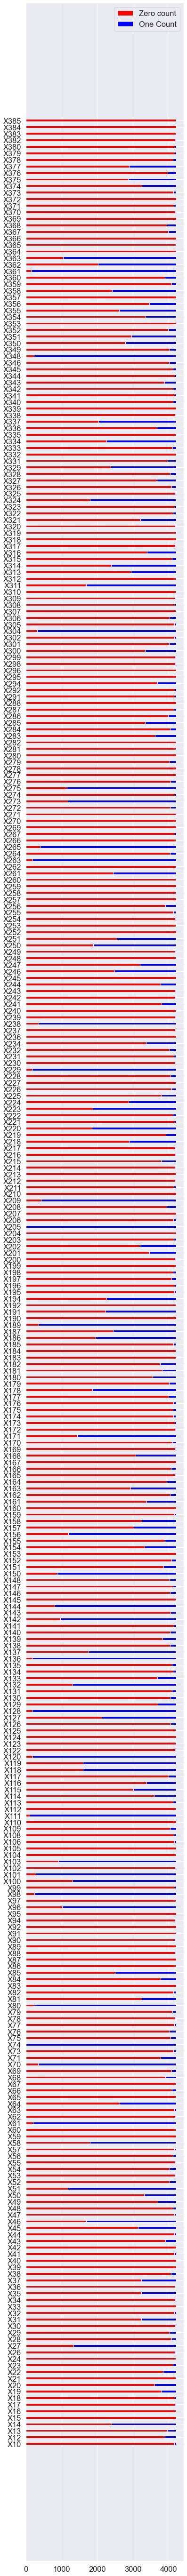

In [15]:
# Visualization of all the [0,1] distribution in the Data sets
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((df_train[col]==0).sum())
    one_count_list.append((df_train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()


### Distribution of y:

In [16]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

__Note:__ Average time is 100 Secs, there seem to be some outliers here due to the distance between the 75th percentile and Max Value 

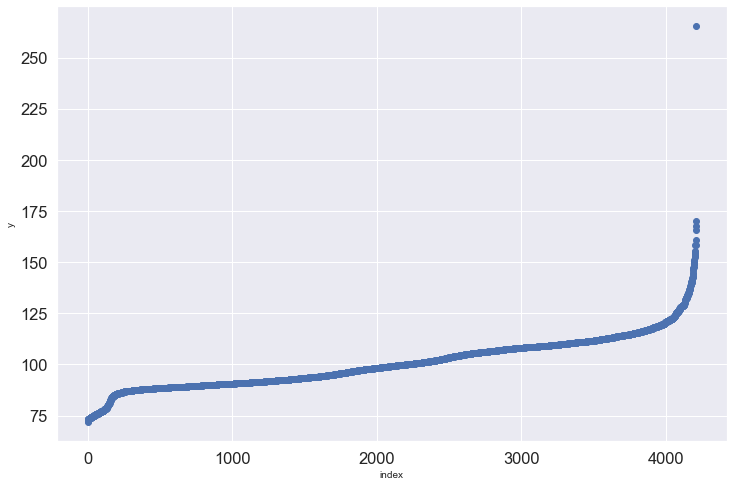

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))

plt.xlabel('index',fontsize=10)
plt.ylabel('y', fontsize=10);

Text(0.5, 0, 'Testing Time in Secs')

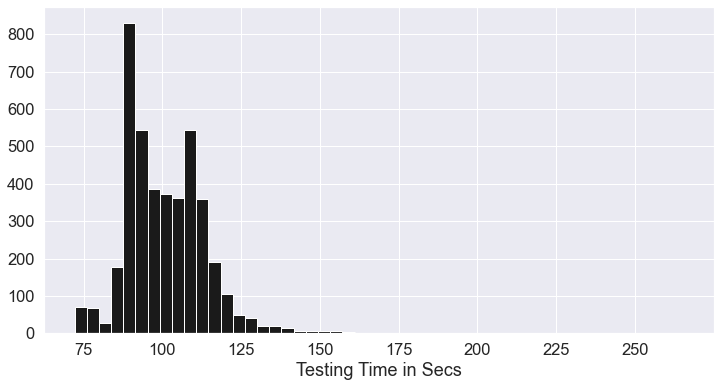

In [18]:
plt.figure(figsize=(12,6))

plt.hist(df_train['y'], bins=50, color='k')
plt.xlabel('Testing Time in Secs')

The data appears to be skewed, but there dont seem to be too many outliers so can be ignored for now

Text(0.5, 0, 'y values')

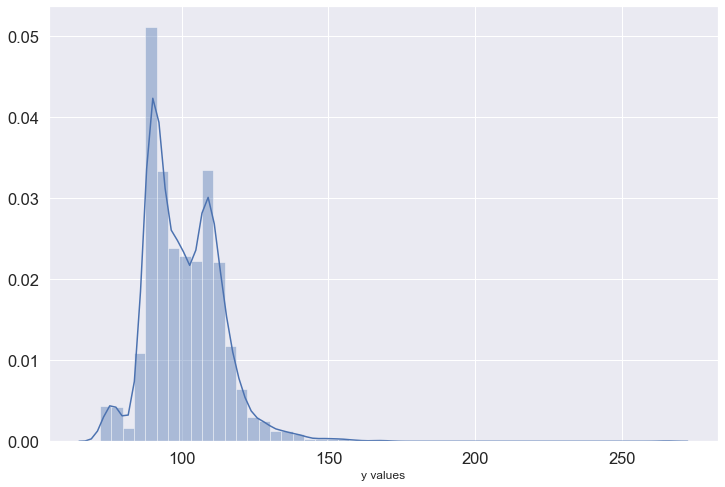

In [19]:
plt.figure(figsize=(12,8))

sns.distplot(df_train.y.values, bins =50, kde=True)
plt.xlabel('y values', fontsize=12)

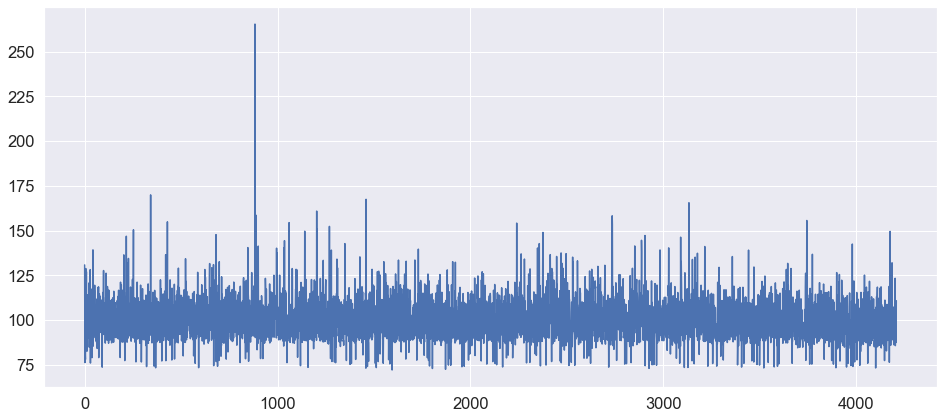

In [20]:
plt.figure(figsize=(16,7))
plt.plot(df_train['y'])

### Tests for normal distributon:

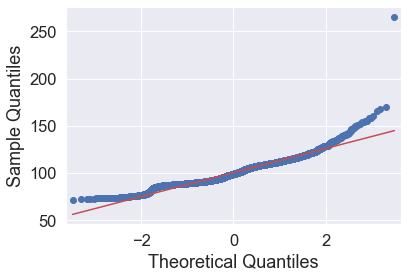

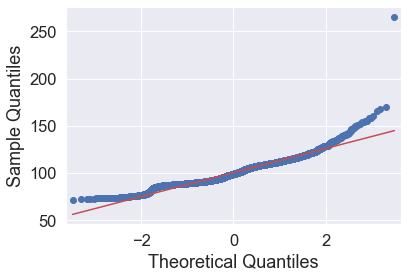

In [21]:
# Normality Test : qqplot
qqplot(df_train['y'],line='s')

In [22]:
# Normality Test : Shaprio Wilk Test
stat, p = shapiro(df_train['y'])
print('Statistice = %.3f, p = %.3f' %(stat,p))


alpha = 0.05
if p> alpha:
    print('Sample looks Gaussian (fail to reject Null)')
else: 
    print('Sample does not look Gaussian (Reject Null)')

Statistice = 0.939, p = 0.000
Sample does not look Gaussian (Reject Null)


In [23]:
# Normality Test : D'Agostino's K^2 Test 
stat, p = normaltest(df_train['y'])
print('Statistice = %.3f, p = %.3f' %(stat,p))

alpha = 0.05
if p> alpha:
    print('Sample looks Gaussian (fail to reject Null)')
else: 
    print('Sample does not look Gaussian (Reject Null)')

Statistice = 1302.013, p = 0.000
Sample does not look Gaussian (Reject Null)


In [24]:
# Normality Test : Anderson Test 
result = anderson(df_train['y'])
p=0
print('{:12s} {:12s} {:12s}'.format('SigniLevel', 'Test Stat', 'Crit Val'))
print('{:12s} {:12s} {:12s}'.format('----------', '---------', '--------'))
for i in range (len(result.critical_values)):
    s1, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < (result.critical_values[i]):
        print('{:8d}% {:12.3f} {:10.3f} Test Stat < CV, (Fail to reject Null)'. format(int(s1), result.statistic, cv))
    else:
        print('{:8d}% {:12.3f} {:10.3f} Test Stat >= CV, (Reject Null)'. format(int(s1), result.statistic, cv))


SigniLevel   Test Stat    Crit Val    
----------   ---------    --------    
      15%       43.248      0.575 Test Stat >= CV, (Reject Null)
      10%       43.248      0.655 Test Stat >= CV, (Reject Null)
       5%       43.248      0.786 Test Stat >= CV, (Reject Null)
       2%       43.248      0.917 Test Stat >= CV, (Reject Null)
       1%       43.248      1.091 Test Stat >= CV, (Reject Null)


In [25]:
result = anderson(df_train['y'])
print(result)

AndersonResult(statistic=43.24800930089441, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


__Data does not look normally distributed__

### Analyze the column types:

In [26]:
dtype_df = df_train.dtypes.reset_index()

In [27]:
dtype_df.columns = ['count','Column Type']
dtype_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,count
0,int64,369
1,float64,1
2,object,8


In [28]:
# the Objects need to be converted
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
objects = ['object']

In [29]:
df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

In [30]:
print(df_train_num.shape, df_train_cat.shape)
print('------------------------')
print(df_train_cat.columns)
print('-----------------------------------------------------------------')
print(df_train_num.columns)

(4209, 370) (4209, 8)
------------------------
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
-----------------------------------------------------------------
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


### Unique Values in the Categorical Features:

__Training data:__

In [31]:
for col_name in df_train_cat.columns: 
    print('The Unique values in '+col_name+' are ', df_train_cat[col_name].nunique())
    print(df_train_cat[col_name].unique())
    print('-----x----x-----')

The Unique values in X0 are  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
-----x----x-----
The Unique values in X1 are  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
-----x----x-----
The Unique values in X2 are  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
-----x----x-----
The Unique values in X3 are  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
-----x----x-----
The Unique values in X4 are  4
['d' 'b' 'c' 'a']
-----x----x-----
The Unique values in X5 are  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
-----x----x-----
The U

__Testing Data:__

In [32]:
df_test_num = df_test.select_dtypes(include=numerics)
df_test_cat = df_test.select_dtypes(include=objects)

In [33]:
for col in df_test_cat.columns: 
    print('The Unique values in '+col+' are ', df_test_cat[col].nunique())
    print(df_test_cat[col].unique())
    print('-----x----x-----')

The Unique values in X0 are  49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
-----x----x-----
The Unique values in X1 are  27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
-----x----x-----
The Unique values in X2 are  45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
-----x----x-----
The Unique values in X3 are  7
['f' 'a' 'c' 'e' 'd' 'g' 'b']
-----x----x-----
The Unique values in X4 are  4
['d' 'b' 'a' 'c']
-----x----x-----
The Unique values in X5 are  32
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o'

In [34]:
cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols:
    print(df_test_cat[col].nunique(),df_train_cat[col].nunique())

49 47
27 27
45 44
7 7
4 4
32 29
12 12
25 25


##### There is a problem!!
- X0 has __49__ unique values in testing data and __47__ in Training data.
- X2 has __45__ unique values in testing data and __44__ in Training data. 
- X5 has __32__ unique values in testing data and __29__ in Training data. 

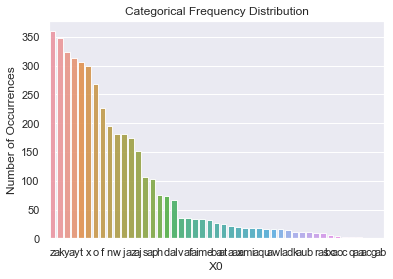

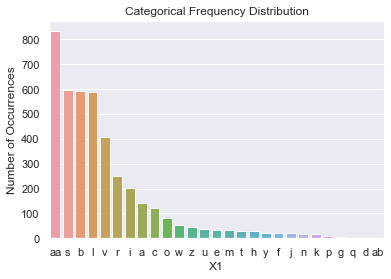

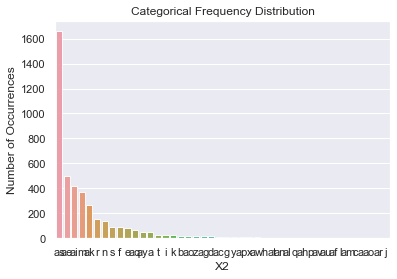

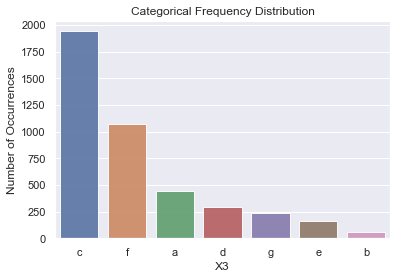

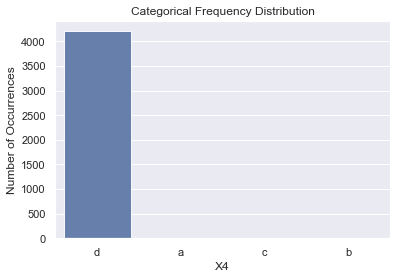

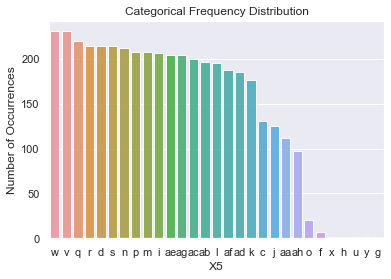

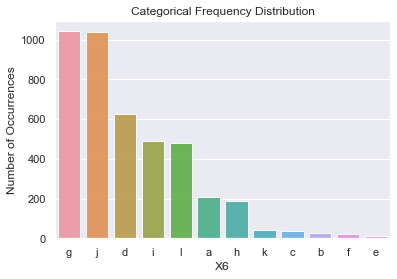

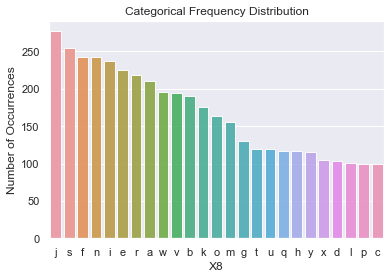

In [35]:
# spread wethin each categorical variable
cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols: 
    cat_count = df_train_cat[col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plt.title('Categorical Frequency Distribution')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

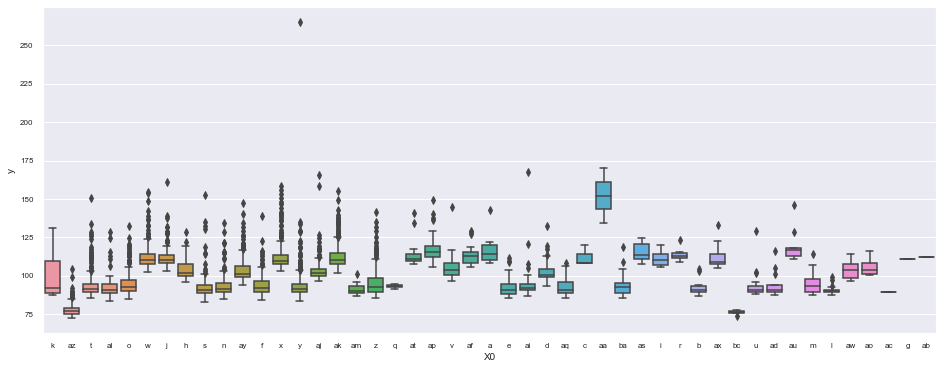

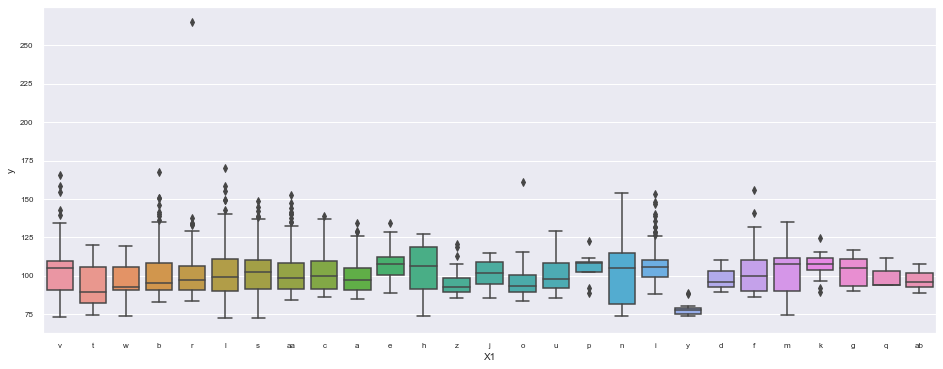

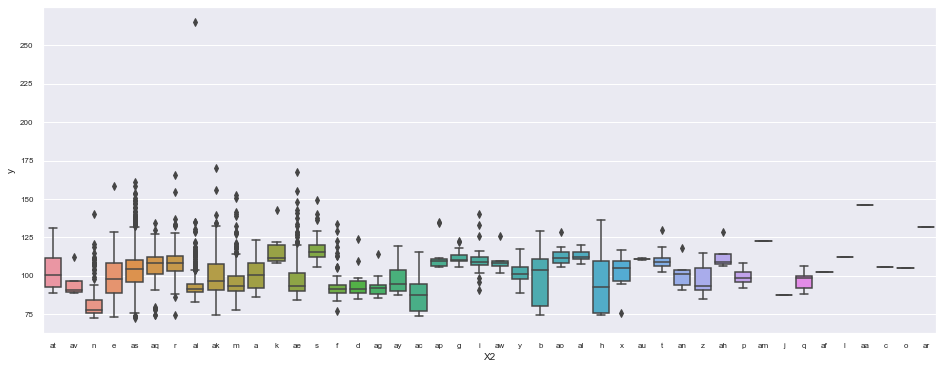

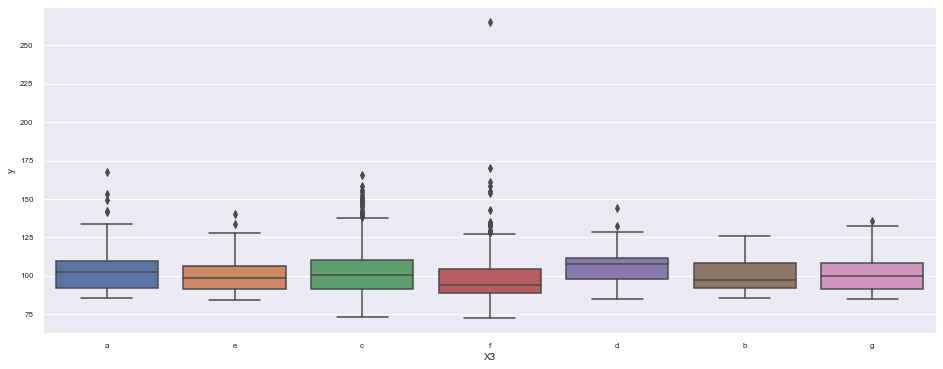

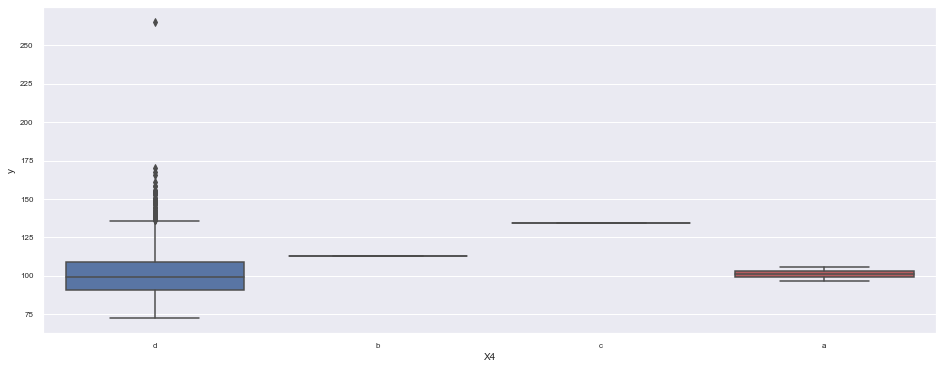

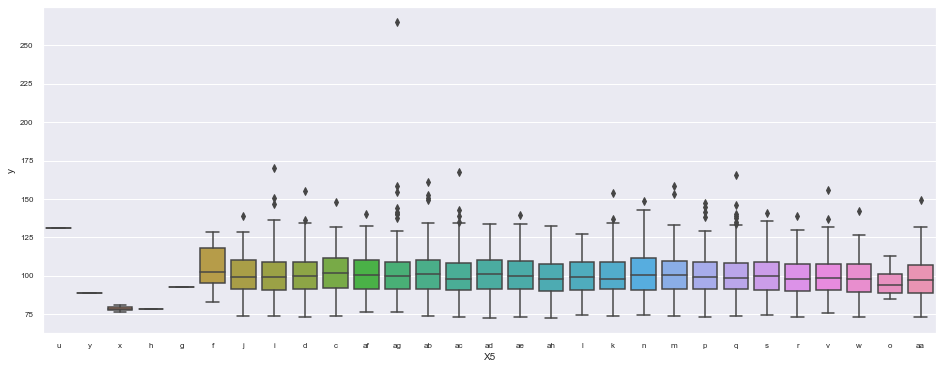

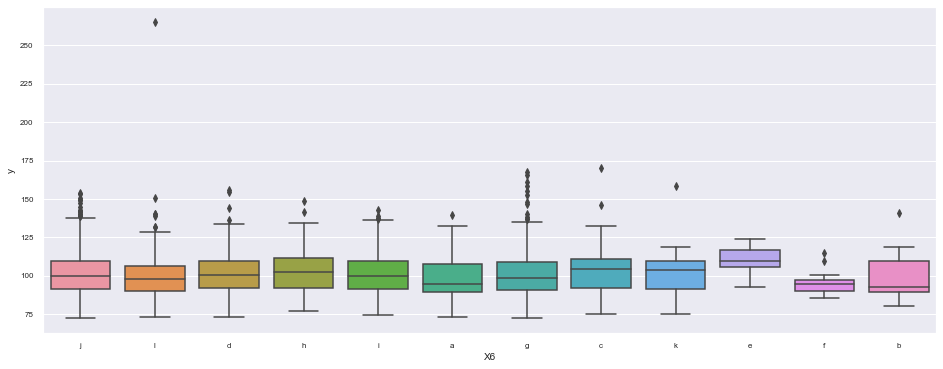

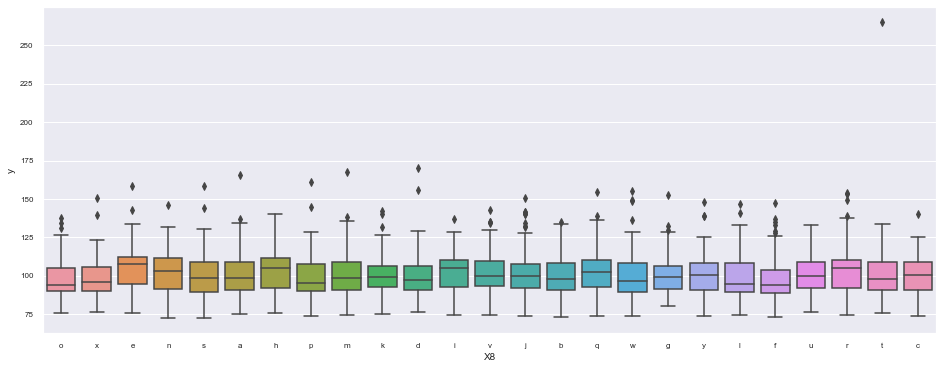

In [36]:
# spread with respect to y in each categorical variable
cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

for col in cols: 
    plt.figure(figsize=(16,6))
    sns.boxplot(x=col, y = 'y', data=df_train)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("y",fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    

X0: The response time is not Uniform across the values, variance is high
X1: Can consider Dropping are response time is consistent across
X2: Lot of variation across categories, good to keep
X3: Does not seem to have any variation, consistent across all categories, can remove it
X4: Does not seem to have any variation, consistent across all categories, can remove it
X5: poor
X6: poor
X8: poor

### Check for Outliers: 

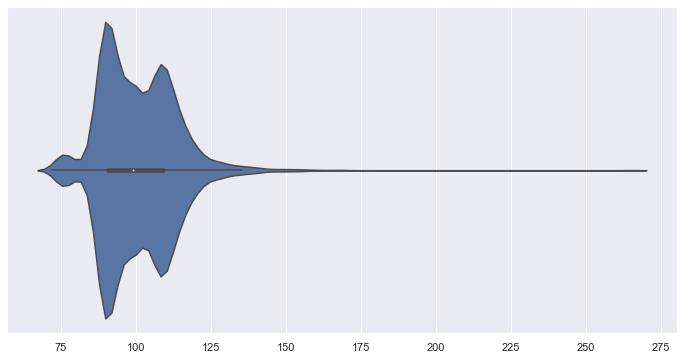

In [37]:
plt.figure(figsize=(12,6))
sns.violinplot(df_train['y'].values)

In [38]:
Q1 = np.percentile(df_train.loc[:, 'y'],25)
Q2 = np.percentile(df_train.loc[:, 'y'],50)
Q3 = np.percentile(df_train.loc[:, 'y'],75)
step = (Q3-Q1)*3
#print('Q1 = {} --- Q2 = {} --- Q3 = {} ---- Outlier Step ={}'.format(Q1,Q2,Q3, step))
print('Q1 = %.2f --- Q2 = %.2f --- Q3 = %.2f ---- Outlier Step = %.3f'%(Q1,Q2,Q3, step))

Q1 = 90.82 --- Q2 = 99.15 --- Q3 = 109.01 ---- Outlier Step = 54.570


In [39]:
outlier_lower_idx = df_train[df_train['y'] <= (Q1-step)].index
outlier_upper_idx = df_train[df_train['y'] > (Q3+step)].index

In [40]:
no_lower_outlier = len(outlier_lower_idx)
no_upper_outlier = len(outlier_upper_idx)

print('Number of Outliers on the lower extreme side = {}'.format(no_lower_outlier))
print('Number of Outliers on the upper extreme side = {}'.format(no_upper_outlier))
print('-----OR-----')
print('Lower Outlier = {}%'.format(no_lower_outlier/df_train.shape[0] * 100))
print('Upper Outlier = {}%'.format(no_upper_outlier/df_train.shape[0] * 100))


Number of Outliers on the lower extreme side = 0
Number of Outliers on the upper extreme side = 4
-----OR-----
Lower Outlier = 0.0%
Upper Outlier = 0.09503444998812069%


In [41]:
# Severity of Outlier Samples
df_train.iloc[outlier_upper_idx]['y'].sort_values(ascending=False)

883     265.32
342     169.91
1459    167.45
3133    165.52
Name: y, dtype: float64

In [42]:
# 3:28
df_train[df_train.y >=170]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [44]:
df_train.shape

(4209, 378)

### Check for duplicates in the data

In [45]:
print('Count of duplicates ={}'.format(len(df_train[df_train.drop(['ID','y'],axis=1).duplicated()])))
print('%age of duplicates ={}'.format(len(df_train[df_train.drop(['ID','y'],axis=1).duplicated()])/df_train.shape[0]*100))

Count of duplicates =298
%age of duplicates =7.080066524114992


In [46]:
def average_dups(x):
    Y.loc[list(x.index)] = Y.loc[list(x.index)].mean()

In [47]:
X = df_train.drop(['y'], axis=1)
Y = df_train['y']

dups = X[X.duplicated(keep=False)]
dups.groupby(dups.columns.tolist()).apply(average_dups)
df_train.drop(X[X.duplicated()].index.values, axis=0, inplace=True)

In [48]:
X = df_train.drop(['y'], axis = 1)
Y = df_train['y']

X.reset_index(inplace=True, drop=True)
Y.reset_index(inplace=True, drop=True)

In [49]:
X.shape, Y.shape

((4209, 377), (4209,))

__No Duplicates in the DataSet__

self ref : 3.29 - 3.36

### Convert Categorical to Dummy Variable:

- As noticed earlier there is a mismatch in the training data and testing data categories. We can combine both of them to be able to get a complete overview. 
- __Also Note: The Y values are missing in the test data set.__
- As we do not know the dependencies wethin the categorical variables, we are converting it into Dummy Variables

In [50]:
df_train.shape , df_test.shape

((4209, 378), (4209, 377))

In [51]:
df_train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4199, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208],
           dtype='int64', length=4209)

In [52]:
data = df_train.append(df_test, ignore_index=True)
data = pd.get_dummies(data)

C:\Python\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [53]:
data.index

RangeIndex(start=0, stop=8418, step=1)

In [54]:
# split in to training and test data again
train, test = data[0:len(df_train)], data[len(df_train):]

In [55]:
train.shape , test.shape

((4209, 581), (4209, 581))

In [56]:
train.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_train_1 = train.drop(['y','ID'],axis=1)
y_train_1 = train.y

X_test_1 = test.drop(['y','ID'],axis=1)

### Linear Regression:

In [58]:
from sklearn import linear_model
lin_reg = LinearRegression()

In [59]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_train_1,
                                                   y_train_1,
                                                   test_size = 0.25,
                                                   random_state=4)

In [64]:
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
#print (f'Coefficients : {lin_reg.coef_}')
#print (f'Intercept    : {lin_reg.intercept_}')
print (f'R^2          : {lin_reg.score(X_train,y_train)}')
print (f'R^2          : {lin_reg.score(X_test,y_test)}')
print("MSE          : %.2f" % mean_squared_error(y_test, y_pred))

R^2          : 0.6256912950535034
R^2          : -1.2109278111685196e+23
MSE          : 18700863173589891415015424.00


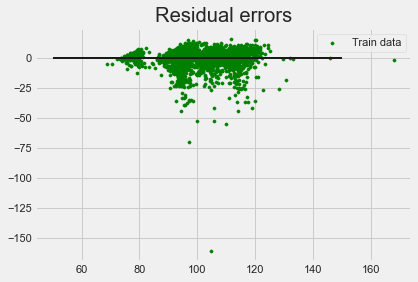

In [61]:
plt.style.use('fivethirtyeight') 
  
# plotting residual errors in training data 
plt.scatter(lin_reg.predict(X_train), lin_reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 50, xmax = 150, linewidth = 2) 

plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

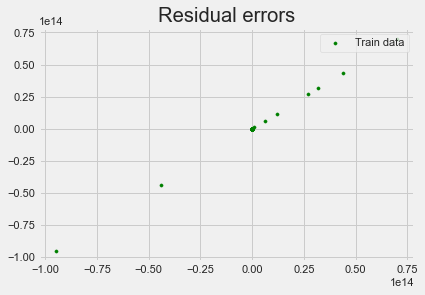

In [62]:
plt.style.use('fivethirtyeight') 
  
# plotting residual errors in training data 
plt.scatter(lin_reg.predict(X_test), lin_reg.predict(X_test) - y_test, 
            color = "green", s = 10, label = 'Train data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 50, xmax = 150, linewidth = 2) 

plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

In [65]:
residual = lin_reg.predict(X_test)-y_test
np.sort(residual.values)

array([-9.49326912e+13, -4.40507666e+13, -5.85237500e+01, ...,
        3.17045267e+13,  4.36669603e+13,  7.01435348e+13])

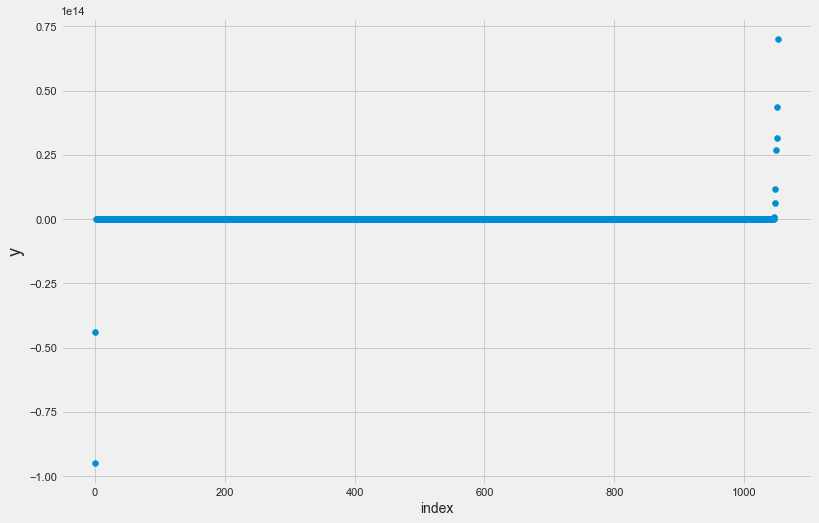

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(residual)), np.sort(residual.values))
plt.xlabel('index',fontsize=14)
plt.ylabel('y', fontsize=18);

### Ridge Regression:

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train_1,
                                                   y_train_1,
                                                   test_size = 0.25,
                                                   random_state=4)

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
alpha = .3
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
c_score_test = r2_score(y_test, model.predict(X_test))
c_score_train = r2_score(y_test, model.predict(X_test))

In [74]:
print('Training Score       : %.3f' %c_score_train)
print('Testing Score        : %.3f' %c_score_test)
print("Mean squared error   : %.2f" % mean_squared_error(y_test, y_pred))

Training Score       : 0.534
Testing Score        : 0.534
Mean squared error   : 71.92


In [75]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 1.42978737e-01 -8.51161204e-01 -5.56744200e-01 -7.86548384e-01
 -4.29778759e+00  6.75658308e+00  2.43102909e+00  1.86360693e+00
  0.00000000e+00 -1.96295506e+00  8.12334751e-01  0.00000000e+00
 -1.30374323e+00  5.80426617e-01 -1.88953851e+00  1.30911189e+00
 -4.21613472e-01  2.61581807e+00  5.69653848e-01  2.17124653e+00
  1.32290522e+00  1.32290522e+00  2.49633108e+00 -3.00215976e-01
 -1.24283665e+00  5.20647395e+00  2.76491586e-01 -5.71025086e-01
  4.65269887e-01 -4.83065230e+00 -3.54282068e+00 -5.84442501e+00
  2.57004128e+00  3.54282068e+00 -3.63471373e+00 -5.21187782e+00
  1.33091689e+00  1.30911189e+00 -3.06993356e+00 -4.85394981e+00
 -2.62287064e-01  9.58588529e-01 -2.45453599e+00  1.85338248e+00
  9.13287009e-01 -8.44898094e-01 -1.12644849e-02 -2.06344990e+00
  2.25028547e+00  6.57064320e-01  9.58588529e-01  1.30911189e+00
 -2.30122433e+00  1.25156715e+00 -3.86232660e-02  6.18428007e-01
  5.41538889e-01 -1.31986478e+00 -4.51674302e-01  1.26124837e+00
  4.14515

### Identify Variables with zero standard deviation:

In [76]:
desc = df_train.describe().transpose()
zero_std = desc.loc[desc['std']==0].index.values

In [77]:
desc

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [78]:
zero_std

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

### Principal Component Analysis:

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [82]:
pca2 = PCA(n_components=2)
pca2_results = pca2.fit_transform(X_train)

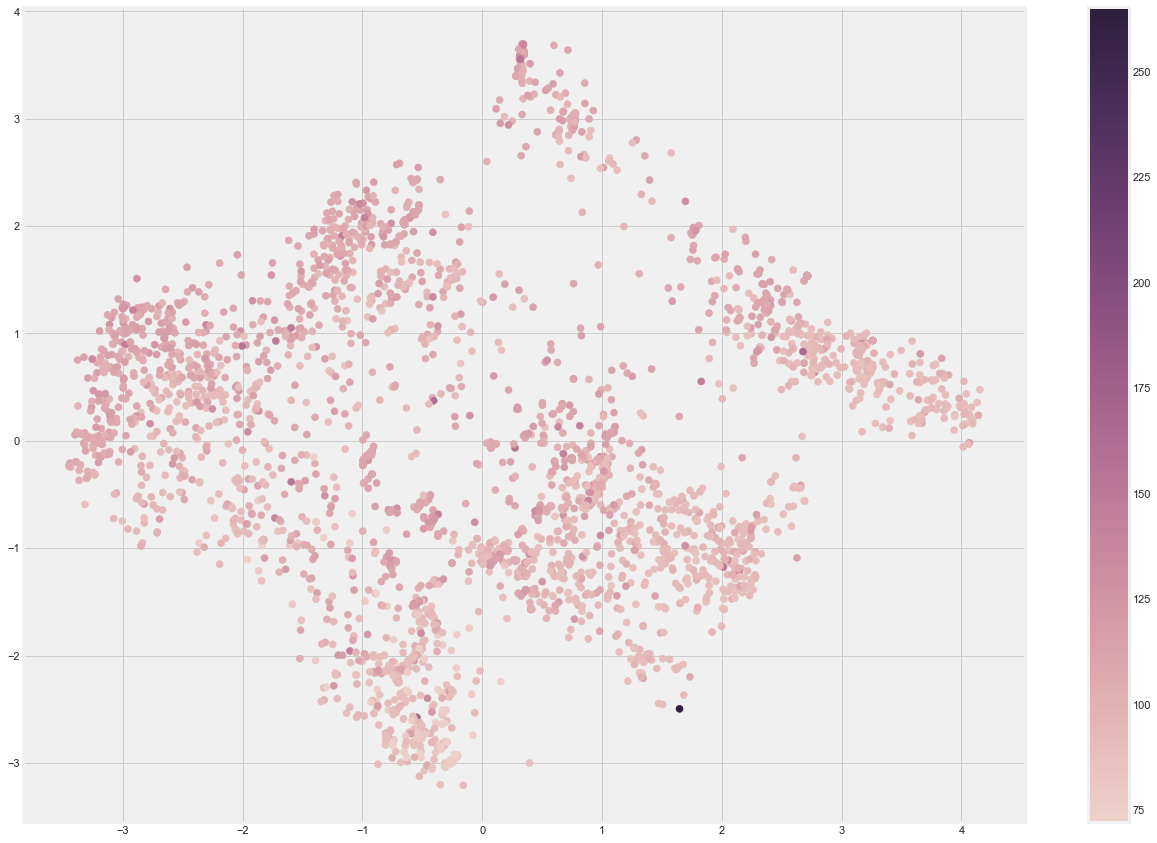

In [83]:
cmap = sns.cubehelix_palette(as_cmap=True)
f,ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results[:,0],pca2_results[:,1],c=y_train,s=50, cmap=cmap )
f.colorbar(points)
plt.show()

### Random Forest:

In [31]:
# instantiate the RF regressor
rf_reg = RandomForestRegressor(n_estimators=100, 
                              max_depth = 20, 
                              max_features = 'auto',
                              min_samples_split = 0.05, 
                              criterion = 'mse')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train_1,
                                                   y_train_1,
                                                   test_size = 0.25,
                                                   random_state=4)

In [33]:
%%time
rf_reg.fit(X_train, y_train)

Wall time: 5.53 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
%%time
y_pred = rf_reg.predict(X_train)

print('\nTraining Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_train, y_pred))
print('R2 Score            : %.2f'% r2_score(y_train,y_pred))

y_pred = rf_reg.predict(X_test)

print('\nTesting Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_test, y_pred))
print('R2 Score            : %.2f'% r2_score(y_test,y_pred))



Training Score : 
Mean Squared Error : 60.57
R2 Score            : 0.63

Testing Score : 
Mean Squared Error : 67.60
R2 Score            : 0.56
Wall time: 46.8 ms


In [35]:
%%time
kf = KFold(n_splits=10, random_state=100)

rf_reg = RandomForestRegressor(n_estimators=100, 
                              max_depth = 20, 
                              max_features = 'auto',
                              min_samples_split = 0.05, 
                              criterion = 'mse')

kf_results = cross_val_score(estimator = rf_reg, 
                            X = X_train_1,
                            y = y_train_1,
                            cv = kf, 
                            scoring= 'neg_mean_squared_error')

print('Mean MSE : \n', -kf_results.mean())

C:\Python\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean MSE : 
 72.90122012398471
Wall time: 1min 11s


In [36]:
%%time
kf = KFold(n_splits=5, random_state=20)

scoring = {'r2' : 'r2', 
          'MSE': 'neg_mean_squared_error'}

rf_reg = RandomForestRegressor(n_estimators=100, 
                              max_depth = 20, 
                              max_features = 'sqrt',
                              min_samples_split = 0.1, 
                              criterion = 'mse')

scores = cross_validate(estimator = rf_reg, 
                         X = X_train_1,
                         y = y_train_1,
                         cv = kf, 
                         scoring= scoring,
                        return_train_score=True)

print('Score Keys : \n', scores.keys())

print('Training r2 = {}'.format(scores['train_r2'].mean()))
print('Testing r2 = {}'.format(scores['test_r2'].mean()))

print('Training MSE = {}'.format(scores['train_MSE'].mean()))
print('Testing MSE = {}'.format(scores['test_MSE'].mean()))

#print('Mean MSE : \n', -kf_results.mean())

C:\Python\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 = 0.5488191713192021
Testing r2 = 0.5325489607368666
Training MSE = -72.63840236184365
Testing MSE = -76.1926723762676
Wall time: 1.95 s


#### Grid Search

In [39]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}

params = dict( n_estimators = [10, 20, 50, 80, 200],
             criterion =['mse'],
             max_depth = [6, 8, 10, 12],
             max_features = ['sqrt', 'log2'],
             min_samples_split = [.10, .20, .40])
params

{'n_estimators': [10, 20, 50, 80, 200],
 'criterion': ['mse'],
 'max_depth': [6, 8, 10, 12],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [0.1, 0.2, 0.4]}

In [69]:
gs = RandomizedSearchCV(estimator=RandomForestRegressor(),
                       param_distributions = params,
                       scoring=scoring,
                       # n_jobs=-1,
                       refit='MSE',
                       cv=rs,
                       return_train_score = True,
                       verbose=1)

In [70]:
%%time
# test on small data set
#gs.fit(X_train_1[:500],y_train_1[:500])  

gs.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.4s finished


Wall time: 9.88 s


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min...
                               

In [71]:
results = gs.cv_results_

In [72]:
print('Mean training MSE = {}'.format(results['mean_train_MSE'].mean()))
print('Mean testing MSE = {}'.format(results['mean_test_MSE'].mean()))
print('\n')
print('Mean training R2 = {}'.format(results['mean_train_R2'].mean()))
print('Mean test R2 = {}'.format(results['mean_test_R2'].mean()))

Mean training MSE = -89.03711067998317
Mean testing MSE = -96.67475788649813


Mean training R2 = 0.4419633272276856
Mean test R2 = 0.4171555532488478


In [73]:
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
-80.99226161002572
{'n_estimators': 80, 'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'mse'}


### KNN Regressor:

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
#Hamming Distance is used for categorical variables. 
# If the value (x) and the value (y) are the same the distance D=0, else D=1.
knn = KNeighborsRegressor(n_neighbors=5, metric='hamming', 
                          weights='distance', algorithm='brute')

In [76]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [77]:
%%time
y_pred = knn.predict(X_train)

print('\nTraining Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_train, y_pred))
print('R2 Score : %.2f'%r2_score(y_train,y_pred))

y_pred = knn.predict(X_test)

print('\nTesting Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_test, y_pred))
print('R2 Score : %.2f'%r2_score(y_test,y_pred))



Training Score : 
Mean Squared Error : 4.24
R2 Score : 0.97

Testing Score : 
Mean Squared Error : 94.65
R2 Score : 0.39
Wall time: 16.1 s


R2 in Training Data is very good , the performance drops in Testing data though

In [78]:
clf = KNeighborsRegressor()

In [79]:
n_neighbors = [3, 5, 7, 9, 11, 13, 15]
# algos = ['balll_tree', 'kd_tree', 'brute']
dist_metric = ['hamming', 'jaccard']
p_root = [1,2,3,4]
weights = ['uniform', 'distance']
#leaf_size = [5, 15, 30, 40, 50, 60]

In [80]:
# define parameters
parameters =dict(n_neighbors = n_neighbors, 
                #algorithm = algos, 
                metric = dist_metric, 
                #p = p_root, 
                weights = weights
                #leaf_size = leaf_size
                )

print(parameters)

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'metric': ['hamming', 'jaccard'], 'weights': ['uniform', 'distance']}


In [81]:
# define splits
n_splits = 3

kf = KFold(n_splits = n_splits, random_state= 100)
skf = StratifiedKFold(n_splits=n_splits, random_state=100)

C:\Python\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [82]:
grid = RandomizedSearchCV(estimator=clf, 
                         param_distributions = parameters, 
                         scoring = 'r2', 
                         cv=kf, 
                         verbose=2)

In [83]:
grid.fit(X_train_1, y_train_1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] weights=distance, n_neighbors=11, metric=jaccard ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . weights=distance, n_neighbors=11, metric=jaccard, total=   9.4s
[CV] weights=distance, n_neighbors=11, metric=jaccard ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV] . weights=distance, n_neighbors=11, metric=jaccard, total=   9.5s
[CV] weights=distance, n_neighbors=11, metric=jaccard ................
[CV] . weights=distance, n_neighbors=11, metric=jaccard, total=   9.5s
[CV] weights=distance, n_neighbors=7, metric=jaccard .................
[CV] .. weights=distance, n_neighbors=7, metric=jaccard, total=   9.3s
[CV] weights=distance, n_neighbors=7, metric=jaccard .................
[CV] .. weights=distance, n_neighbors=7, metric=jaccard, total=   9.4s
[CV] weights=distance, n_neighbors=7, metric=jaccard .................
[CV] .. weights=distance, n_neighbors=7, metric=jaccard, total=   9.3s
[CV] weights=distance, n_neighbors=13, metric=jaccard ................
[CV] . weights=distance, n_neighbors=13, metric=jaccard, total=   9.6s
[CV] weights=distance, n_neighbors=13, metric=jaccard ................
[CV] . weights=distance, n_neighbors=13, metric=jaccard, total=   9.7s
[CV] weights=distance, n_neighbors=13, metric=jaccard ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.7min finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['hamming', 'jaccard'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=2)

In [84]:
print('Estimator: \n', grid.best_estimator_)
print('Best Params : \n ', grid.best_params_)
print(grid.best_score_)

Estimator: 
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
Best Params : 
  {'weights': 'distance', 'n_neighbors': 15, 'metric': 'hamming'}
0.45659297948692656


In [85]:
knn = KNeighborsRegressor(n_neighbors=17, metric='hamming', weights= 'distance')

#fit the data 
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_train)

print('\nTraining Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_train, y_pred))
print('R2 Score : %.2f'%r2_score(y_train,y_pred))

y_pred = knn.predict(X_test)

print('\nTesting Score : ')
print('Mean Squared Error : %.2f'%mean_squared_error(y_test, y_pred))
print('R2 Score : %.2f'%r2_score(y_test,y_pred))



Training Score : 
Mean Squared Error : 4.24
R2 Score : 0.97

Testing Score : 
Mean Squared Error : 86.17
R2 Score : 0.44


In [86]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [87]:
df_results = pd.DataFrame(data=results)
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.065048,0.002794,0.008805,0.001149,10,0.1,sqrt,10,mse,"{'n_estimators': 10, 'min_samples_split': 0.1,...",...,-82.991831,17.449033,3,-66.458624,-82.412895,-83.248096,-66.075186,-73.180497,-74.275060,7.433336
1,0.519337,0.052355,0.023230,0.002536,200,0.2,sqrt,6,mse,"{'n_estimators': 200, 'min_samples_split': 0.2...",...,-87.871691,19.201822,5,-77.106136,-87.554284,-86.715957,-73.812694,-76.850702,-80.407955,5.619865
2,0.061629,0.005092,0.008398,0.000500,20,0.2,log2,8,mse,"{'n_estimators': 20, 'min_samples_split': 0.2,...",...,-103.302540,17.882461,7,-88.842720,-104.647026,-105.116817,-86.645139,-93.828245,-95.815990,7.761117
3,0.298265,0.033066,0.014966,0.001407,80,0.1,sqrt,10,mse,"{'n_estimators': 80, 'min_samples_split': 0.1,...",...,-80.992262,18.596634,1,-66.543277,-78.376027,-78.847977,-66.608144,-68.493092,-71.773703,5.629188
4,0.054476,0.004247,0.008185,0.000405,20,0.4,log2,6,mse,"{'n_estimators': 20, 'min_samples_split': 0.4,...",...,-121.105580,17.780551,9,-111.019969,-128.084432,-122.265389,-105.059949,-108.909406,-115.067829,8.668401


In [90]:
df_results.to_excel("output.xlsx", sheet_name='Results')

### Plot the results

Needs work!!!!!!

plt.figure(figsize=(13,13))
plt.title('GridSearchCV for multiple Scores', fontsize=16)

plt.xlabel('min_samples_split')
plt.ylabel('Score')

ax = plt.gca()
ax.set_xlim(0,402)
ax.set_ylim(0.70, 1)

##### get numpy array from masked array
X_axis = np.array(results['param_min_samples_split'].data, dtype = float)

for scorer, color in zip(sorted(scoring),['g','k']):
    sample_score_mean = results['mean_%s_%s'%(sample, scorer )]
    sample_score_std = results['std_%s_%s'%(sample, scorer )]
    
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                   sample_score_mean + sample_score_std,
                   alpha=0.1 if sample =='test' else 0, color=color)
    
    ax.plot(X_axis, sample_score_mean, style, color=color,
           alpha =1 if sample =='test' else 0.7,
           label ='%s (%s)' % (scorer, sample))
    
    best_index = np.nonzero(results['rank_test_%s' % scorer]== 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    
    # 3:33:15 -> plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0,best_score], 
           linestyle='-', color=color, marker='x', markeredgewidth=3, ms=8)
    
    # Annotate the best score for that scorer
    ax.annotate('%0.2f'% best_score, 
               (X_axis[best_index], best_score+0.005))
    
plt.legend(loc='best')
plt.grid('off')
    
    

# Learning Curve

### Grid search with Random Forest 3:33

### Adaboost Regressor:

In [88]:
from sklearn.ensemble import AdaBoostRegressor

In [89]:
abc = AdaBoostRegressor(n_estimators=500,
                       learning_rate=0.01)

In [90]:
abc.get_params()

{'base_estimator': None,
 'learning_rate': 0.01,
 'loss': 'linear',
 'n_estimators': 500,
 'random_state': None}

In [91]:
abc.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=500, random_state=None)

In [92]:
%%time 
kf = KFold(n_splits = 5 , random_state=20 )

scoring = {'r2':'r2', 
          'MSE' : 'neg_mean_squared_error'}

scores = cross_validate(estimator=abc, 
                       X = X_train_1, 
                       y = y_train_1, 
                       cv = kf, 
                       scoring = scoring,
                       return_train_score = True)

print('Score Keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['test_MSE'].mean()))


C:\Python\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : 0.5745589707474441
Testing r2 : 0.5270609320002111
Training MSE : -68.30722190698609
Testing MSE : -76.71513478220368
Wall time: 3min 49s


__Interpretation:__
- The results do not seem very good using AdaBoost Model. The R2 for Training data is 57% and for Testing data is 52%

In [93]:
%%time 
y_pred = abc.predict(X_train)

print('Training Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_train, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

print('R2 Value : ', metrics.r2_score(y_train, y_pred))

y_pred = abc.predict(X_test)

print('\n')
print('Training Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 Value : ', metrics.r2_score(y_test, y_pred))

Training Metrics
Mean Abs Error MAE :  5.916390712302486
Mean Sq Error MSE :  64.44313264279194
Root Mean Sq Error RMSE :  8.027648014380796
R2 Value :  0.6042243247619766


Training Metrics
Mean Abs Error MAE :  6.194169762075363
Mean Sq Error MSE :  70.30490149866834
Root Mean Sq Error RMSE :  8.384801816302419
R2 Value :  0.5447581232163086
Wall time: 5.42 s


__Interpretation:__ Change the dataset to X_trin. 
- The results are slightly better here, with 60% R2 in Trianing and 54% in Testing. 

### Gradient Boosting:

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
# Fit regression model
params = {'n_estimators' :1500, 
         'max_depth' : 4, 
         'min_samples_split' : 2, 
         'learning_rate' : 0.005,
         'loss': 'ls'}

gbr = GradientBoostingRegressor(**params)

In [96]:
# Train G Regressor
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.005, loss='ls',
                          max_depth=4, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
%%time 
kf = KFold(n_splits = 5 , random_state=20 )

scoring = {'r2':'r2', 
          'MSE' : 'neg_mean_squared_error'}

scores = cross_validate(estimator=gbr, 
                       X = X_train_1, 
                       y = y_train_1, 
                       cv = kf, 
                       scoring = scoring,
                       return_train_score = True)

print('Score Keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))

print('Training MSE : {}'.format(scores['train_MSE'].mean()))
print('Testing MSE : {}'.format(scores['test_MSE'].mean()))


C:\Python\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Score Keys : 
 dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MSE', 'train_MSE'])
Training r2 : 0.6757246363612454
Testing r2 : 0.560954159273422
Training MSE : -52.1938048418087
Testing MSE : -71.79640901443781
Wall time: 5min 51s


__Interpretation:__ 
- The Training R2 is 67% and the testing R2 is 56%
- The model is perforing better using Gradient boosting than using AdaBoost.

In [98]:
%%time 
y_pred = gbr.predict(X_train)

print('Training Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_train, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

print('R2 Value : ', metrics.r2_score(y_train, y_pred))

y_pred = gbr.predict(X_test)

print('\n')
print('Testing Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 Value : ', metrics.r2_score(y_test, y_pred))

Training Metrics
Mean Abs Error MAE :  4.688683227206758
Mean Sq Error MSE :  50.54913306913702
Root Mean Sq Error RMSE :  7.109791352011466
R2 Value :  0.6895539299116906


Testing Metrics
Mean Abs Error MAE :  5.533026573773826
Mean Sq Error MSE :  67.92169826969071
Root Mean Sq Error RMSE :  8.241462143921472
R2 Value :  0.5601899620723416
Wall time: 303 ms


__Interpretation:__
- Running the Gradient boosting model on X_train dataset, the models performance improves marginally in Training sample with R2 at 68%. The testing sample gives the same results.

#### Tuning GBM Parameters:

In [99]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [44]:
# tuning the learning rate and number of estimators
#%%time
params = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 
          'n_estimators': [100,250, 500, 750, 1000, 1250, 1750]}

gs = RandomizedSearchCV(estimator=GradientBoostingRegressor(max_depth = 4, 
                                                           min_samples_split = 2, 
                                                           min_samples_leaf= 1,
                                                           subsample = 1, 
                                                           max_features = 'sqrt',
                                                           random_state = 10),
                       param_distributions = params, 
                       scoring = 'neg_mean_squared_error', 
                       n_jobs = 4, 
                       iid = False,
                       cv = 5)

In [101]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 9.81 s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.6s finished


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min...
                               

In [102]:
gs.best_score_, gs.best_params_

(-75.45088144377202,
 {'n_estimators': 20,
  'min_samples_split': 0.2,
  'max_features': 'sqrt',
  'max_depth': 10,
  'criterion': 'mse'})

__Results:__
- The best results amonth the several modles run is that using 750 estimators (Sample size) and a learning arte of 0.01. 
- 

#### Tune for max_depth:

In [103]:
%%time 
params_depth = {'max_depth': [2,3,4,5,6,7,8,9,11,15]}

gs_depth = RandomizedSearchCV(estimator=GradientBoostingRegressor(learning_rate = 0.005, 
                                                                  n_estimators = 1500,
                                                                  min_samples_split = 2, 
                                                                  min_samples_leaf= 1,
                                                                  subsample = 1, 
                                                                  max_features = 'sqrt',
                                                                  random_state = 10),
                              param_distributions = params_depth,
                              scoring = 'neg_mean_squared_error', 
                              n_jobs = 4, 
                              iid = False,
                              cv = 5)

gs_depth.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 2min 18s


In [104]:
gs_depth.best_score_, gs_depth.best_params_

(-72.58254973350694, {'max_depth': 4})

__Results:__
- The best results amonth the several modles run is to use decision trees with a maximum depth of 4 

### XGboost Regression Model:

In [66]:
# import model
import xgboost as xgb 
from sklearn.metrics import mean_absolute_error

In [106]:
# view shape of data
print(X_train_1.shape, y_train_1.shape)

(4209, 579) (4209,)


In [107]:
# train test split
X_train, X,test, y_train, y_test = train_test_split(X_train_1,y_train_1, test_size = .25 , random_state = 12)

ValueError: not enough values to unpack (expected 5, got 4)

In [68]:
# creating a DMatrices for Xgboost training 
# for quick loading of data in binary format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [109]:
# Get predictions on the test data
# To get the range of MAE we build a Baseline Model based on the mean of the y value 
# Get its MAE score.
# The score is what we can achieve with no effort
mean_train = y_train.mean()
baseline_predictions = np.ones(y_test.shape)*mean_train

# compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print('Baseline MAE is {:.2f}'.format(mae_baseline))  #

# here the baseline MAE is 10.07

Baseline MAE is 10.04


Baseline MAE is not required but is good for understanding and comparing the model

#### the params dictionary

In [110]:
# Prepare dict of params for xgboost model.
# it is a basic parameter list 
xgb_params = {
   # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

#### Parameters num_boost_round and early_stoppinh_rounds
*num_boost_round* not part of the params dictionary, it is the number of boosting rounds or trees to build. As its ptimal value depends on other parameters, it should be retuned everytime a parameter is updated. As trees are built sequentially, instead of fixing the number of rounds at the beginning, we can test the model t each step nd see if adding a new tree/round improves the performace. To do so, we define a test dataset and a metric hat is used to assess performances of each round. If performances havent improved for N rounds, we stop the training and keep the best number of boosting rounds. 
*early_stopping_rounds = N* is when algo finds no further benefit. 

First we need to add the evaluation metric we are interested in to our params dictionary. 
Select num_boost_rounds value, keep it large. 


In [45]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [112]:
model = xgb.train(
                params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=[(dtest, "Test")],
                early_stopping_rounds = 10
)

[19:35:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:99.61828
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:99.12168
[2]	Test-mae:98.62757
[3]	Test-mae:98.13593
[4]	Test-mae:97.64675
[5]	Test-mae:97.16000
[6]	Test-mae:96.67570
[7]	Test-mae:96.19379
[8]	Test-mae:95.71430
[9]	Test-mae:95.23720
[10]	Test-mae:94.76249
[11]	Test-mae:94.29014
[12]	Test-mae:93.82014
[13]	Test-mae:93.35251
[14]	Test-mae:92.88720
[15]	Test-mae:92.42420
[16]	Test-mae:91.96352
[17]	Test-mae:91.50516
[18]	Test-mae:91.04908
[19]	Test-mae:90.59528
[20]	Test-mae:90.14373
[21]	Test-mae:89.69443
[22]	Test-mae:89.24738
[23]	Test-

[327]	Test-mae:19.50821
[328]	Test-mae:19.41185
[329]	Test-mae:19.31592
[330]	Test-mae:19.22018
[331]	Test-mae:19.12536
[332]	Test-mae:19.03067
[333]	Test-mae:18.93681
[334]	Test-mae:18.84319
[335]	Test-mae:18.75031
[336]	Test-mae:18.65770
[337]	Test-mae:18.56553
[338]	Test-mae:18.47397
[339]	Test-mae:18.38281
[340]	Test-mae:18.29216
[341]	Test-mae:18.20186
[342]	Test-mae:18.11199
[343]	Test-mae:18.02260
[344]	Test-mae:17.93376
[345]	Test-mae:17.84532
[346]	Test-mae:17.75767
[347]	Test-mae:17.67014
[348]	Test-mae:17.58296
[349]	Test-mae:17.49633
[350]	Test-mae:17.41026
[351]	Test-mae:17.32438
[352]	Test-mae:17.23917
[353]	Test-mae:17.15422
[354]	Test-mae:17.06985
[355]	Test-mae:16.98573
[356]	Test-mae:16.90195
[357]	Test-mae:16.81860
[358]	Test-mae:16.73575
[359]	Test-mae:16.65334
[360]	Test-mae:16.57156
[361]	Test-mae:16.48982
[362]	Test-mae:16.40849
[363]	Test-mae:16.32788
[364]	Test-mae:16.24744
[365]	Test-mae:16.16723
[366]	Test-mae:16.08765
[367]	Test-mae:16.00842
[368]	Test-mae:1

[678]	Test-mae:5.21220
[679]	Test-mae:5.20968
[680]	Test-mae:5.20679
[681]	Test-mae:5.20371
[682]	Test-mae:5.20083
[683]	Test-mae:5.19823
[684]	Test-mae:5.19561
[685]	Test-mae:5.19313
[686]	Test-mae:5.19038
[687]	Test-mae:5.18837
[688]	Test-mae:5.18589
[689]	Test-mae:5.18352
[690]	Test-mae:5.18131
[691]	Test-mae:5.17885
[692]	Test-mae:5.17665
[693]	Test-mae:5.17445
[694]	Test-mae:5.17234
[695]	Test-mae:5.17000
[696]	Test-mae:5.16781
[697]	Test-mae:5.16559
[698]	Test-mae:5.16353
[699]	Test-mae:5.16147
[700]	Test-mae:5.15959
[701]	Test-mae:5.15741
[702]	Test-mae:5.15555
[703]	Test-mae:5.15365
[704]	Test-mae:5.15190
[705]	Test-mae:5.15021
[706]	Test-mae:5.14828
[707]	Test-mae:5.14652
[708]	Test-mae:5.14493
[709]	Test-mae:5.14341
[710]	Test-mae:5.14163
[711]	Test-mae:5.14009
[712]	Test-mae:5.13863
[713]	Test-mae:5.13710
[714]	Test-mae:5.13547
[715]	Test-mae:5.13416
[716]	Test-mae:5.13274
[717]	Test-mae:5.13159
[718]	Test-mae:5.13049
[719]	Test-mae:5.12909
[720]	Test-mae:5.12800
[721]	Test-

In [113]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

#MAE 4.81 with 768 rounds

Best MAE: 5.12 with 750 rounds


__Interpretation:__
- The MAE is 4.81 at 768 rounds
- This MAE is already better than the BaseLine MAE of 10.7
- The maximum number of rounds that could have been run was 999, but the model stopped before itself. This is because after 756 trees, adding more rounds did not lead to improvement in the MAE

### XGB Boost with CV:

In order to tune other HyperParameters, we run CrossValidation on the Training Dataset and return a mean MAE score.

In [114]:
%%time
cv_results = xgb.cv(
                params,
                dtrain,
                num_boost_round=num_boost_round,
                seed=42,
                nfold=5,
                metrics={'mae'},
                early_stopping_rounds=10
)


[19:37:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be u

In [127]:
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,99.686699,0.113430,99.686702,0.455706
1,99.189256,0.112866,99.189334,0.455317
2,98.694273,0.112303,98.694446,0.454928
3,98.201776,0.111735,98.202034,0.454552
4,97.711743,0.111178,97.712076,0.454187
...,...,...,...,...
767,4.080525,0.062125,5.029206,0.322465
768,4.077883,0.062370,5.029157,0.322037
769,4.075426,0.062496,5.029207,0.321518
770,4.072785,0.062509,5.029157,0.320906


The table above corresponds to the number of boosting trees used and the respective MAEs. Again we stopped before 999. 

In [128]:
print(cv_results['test-mae-mean'].min())
# 5.014 is the minimum mae

5.0289786


#### Tunning for max_Depth and min_child_weight:

In [117]:
# set up the grid search
gridsearch_params = [(max_depth, min_child_weight)
    for max_depth in range(9, 12)
    for min_child_weight in range(5, 8)]

In [129]:
#permutations to be checked
gridsearch_params

[(9, 5), (9, 6), (9, 7), (10, 5), (10, 6), (10, 7), (11, 5), (11, 6), (11, 7)]

In [118]:
%%time
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        
print('best param: {}, {}, MAE: {}'.format(best_params[0],best_params[1], min_mae))

                       
                       

CV with max_depth=9, min_child_weight=5
[19:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samp

C:\Python\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 4.9926756 for 773 rounds
CV with max_depth=9, min_child_weight=6
[19:48:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:48:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:48:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328:

	MAE 5.017674599999999 for 770 rounds
CV with max_depth=10, min_child_weight=7
[20:02:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:02:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learne

	MAE 5.0289786 for 771 rounds
best param: 9, 7, MAE: 4.9760698
Wall time: 34min 21s


the best score that we are getting is max_depth of 9 and min_child weight of 6

In [61]:
# update parametrs based on above results
params['max_Depth'] = 10
params['min_child_Weight'] = 5

#### Tuning for subsample and colsample_bytree

- subsample: the fraction of observations (rows) to be subsampled at each step
- colsample_bytree: corresponds to the fraction of features to subsample at each step

In [47]:
#2:04
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]]

In [48]:
gridsearch_params

[(0.7, 0.7),
 (0.7, 0.8),
 (0.7, 0.9),
 (0.7, 1.0),
 (0.8, 0.7),
 (0.8, 0.8),
 (0.8, 0.9),
 (0.8, 1.0),
 (0.9, 0.7),
 (0.9, 0.8),
 (0.9, 0.9),
 (0.9, 1.0),
 (1.0, 0.7),
 (1.0, 0.8),
 (1.0, 0.9),
 (1.0, 1.0)]

In [ ]:
%%time
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)

print('best param: {}, {}, MAE: {}'.format(best_params[0],best_params[1], min_mae))


CV with subsample=1.0, colsample=1.0
[00:49:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:49:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:49:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_

C:\Python\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 5.0289786 for 771 rounds
CV with subsample=1.0, colsample=0.9
[00:53:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:53:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:53:14] WARNING: C:\Users\Administrator\wo

the best parameters from above results are as follows: 
subsample of 0.8 and colsample of 1

In [60]:
params['sub_sample'] = 0.8
params['colsample_bytree']=1

#### Tuning for ETA:
controls the learning rate

In [ ]:
# 06 2.06s
%%time
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta = {}".format(eta))
    
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (eta)

print('best param: {}, {}, MAE: {}'.format(best_params[0],best_params[1], min_mae))


In [57]:
params['eta'] = 0.005

In [73]:
params['learning_rate'] = 0.005
params['n_estimators'] =1500
params['min_samples_split']=2
params['loss']='ls'
params['eval_metric']='mae'
params['min_child_Weight']=6


In [74]:
# Final dictionary 2:07
params

{'learning_rate': 0.005,
 'n_estimators': 1500,
 'eta': 0.005,
 'sub_sample': 0.8,
 'colsample_bytree': 1,
 'max_Depth': 10,
 'min_child_Weight': 6,
 'min_samples_split': 2,
 'loss': 'ls',
 'eval_metric': 'mae',
 'validate_parameters': 1}

### Final XGBoost Model:
Now train the XGBoost model using the above menctions optimised parameters

In [75]:
%%time
model = xgb.train(
                params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=[(dtest, "Test")],
                early_stopping_rounds=10
)

[13:46:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:99.61828
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:99.12168
[2]	Test-mae:98.62757
[3]	Test-mae:98.13593
[4]	Test-mae:97.64675
[5]	Test-mae:97.16000
[6]	Test-mae:96.67570
[7]	Test-mae:96.19379
[8]	Test-mae:95.71430
[9]	Test-mae:95.23720
[10]	Test-mae:94.76249
[11]	Test-mae:94.29014
[12]	Test-mae:93.82014
[13]	Test-mae:93.35251
[14]	Test-mae:92.88720
[15]	Test-mae:92.42420
[16]	Test-mae:91.96352
[17]	Test-mae:91.50516
[18]	Test-mae:91.04908
[19]	Test-mae:90.59528
[20]	Test-mae:90.14373
[21]	Test-mae:8

[325]	Test-mae:19.70095
[326]	Test-mae:19.60362
[327]	Test-mae:19.50682
[328]	Test-mae:19.41041
[329]	Test-mae:19.31436
[330]	Test-mae:19.21873
[331]	Test-mae:19.12392
[332]	Test-mae:19.02938
[333]	Test-mae:18.93553
[334]	Test-mae:18.84213
[335]	Test-mae:18.74925
[336]	Test-mae:18.65645
[337]	Test-mae:18.56440
[338]	Test-mae:18.47266
[339]	Test-mae:18.38158
[340]	Test-mae:18.29058
[341]	Test-mae:18.20038
[342]	Test-mae:18.11084
[343]	Test-mae:18.02135
[344]	Test-mae:17.93253
[345]	Test-mae:17.84404
[346]	Test-mae:17.75606
[347]	Test-mae:17.66869
[348]	Test-mae:17.58169
[349]	Test-mae:17.49483
[350]	Test-mae:17.40863
[351]	Test-mae:17.32287
[352]	Test-mae:17.23768
[353]	Test-mae:17.15277
[354]	Test-mae:17.06852
[355]	Test-mae:16.98457
[356]	Test-mae:16.90097
[357]	Test-mae:16.81774
[358]	Test-mae:16.73499
[359]	Test-mae:16.65287
[360]	Test-mae:16.57087
[361]	Test-mae:16.48965
[362]	Test-mae:16.40865
[363]	Test-mae:16.32821
[364]	Test-mae:16.24792
[365]	Test-mae:16.16800
[366]	Test-mae:1

[676]	Test-mae:5.28418
[677]	Test-mae:5.28078
[678]	Test-mae:5.27736
[679]	Test-mae:5.27426
[680]	Test-mae:5.27123
[681]	Test-mae:5.26856
[682]	Test-mae:5.26562
[683]	Test-mae:5.26284
[684]	Test-mae:5.26027
[685]	Test-mae:5.25756
[686]	Test-mae:5.25500
[687]	Test-mae:5.25220
[688]	Test-mae:5.24953
[689]	Test-mae:5.24704
[690]	Test-mae:5.24449
[691]	Test-mae:5.24214
[692]	Test-mae:5.23962
[693]	Test-mae:5.23716
[694]	Test-mae:5.23482
[695]	Test-mae:5.23237
[696]	Test-mae:5.23031
[697]	Test-mae:5.22813
[698]	Test-mae:5.22583
[699]	Test-mae:5.22390
[700]	Test-mae:5.22173
[701]	Test-mae:5.21993
[702]	Test-mae:5.21797
[703]	Test-mae:5.21596
[704]	Test-mae:5.21406
[705]	Test-mae:5.21219
[706]	Test-mae:5.21044
[707]	Test-mae:5.20878
[708]	Test-mae:5.20709
[709]	Test-mae:5.20569
[710]	Test-mae:5.20410
[711]	Test-mae:5.20256
[712]	Test-mae:5.20108
[713]	Test-mae:5.19977
[714]	Test-mae:5.19832
[715]	Test-mae:5.19698
[716]	Test-mae:5.19564
[717]	Test-mae:5.19477
[718]	Test-mae:5.19338
[719]	Test-

In [76]:
# predict
y_pred = model.predict(dtrain)

print('Training Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_train, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

print('R2 Value : ', metrics.r2_score(y_train, y_pred))

y_pred = model.predict(dtest)

print('\n')
print('Testing Metrics')
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 Value : ', metrics.r2_score(y_test, y_pred))

Training Metrics
Mean Abs Error MAE :  4.461127698291541
Mean Sq Error MSE :  60.23559192052583
Root Mean Sq Error RMSE :  7.761159186650267
R2 Value :  0.6300648170247718


Testing Metrics
Mean Abs Error MAE :  5.170450275997152
Mean Sq Error MSE :  72.56398730022451
Root Mean Sq Error RMSE :  8.51844981790845
R2 Value :  0.5301299758440332


__Interpretstion:__
- the Training data R2 is 65% and the testing data R2 is 60%

In [77]:
#Saving the model for later predictions
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params, 
    dtrain, 
    num_boost_round = num_boost_round,
    evals=[(dtest,'Test')])

[13:49:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { loss, max_Depth, min_child_Weight, min_samples_split, n_estimators, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mae:99.61828
[1]	Test-mae:99.12168
[2]	Test-mae:98.62757
[3]	Test-mae:98.13593
[4]	Test-mae:97.64675
[5]	Test-mae:97.16000
[6]	Test-mae:96.67570
[7]	Test-mae:96.19379
[8]	Test-mae:95.71430
[9]	Test-mae:95.23720
[10]	Test-mae:94.76249
[11]	Test-mae:94.29014
[12]	Test-mae:93.82014
[13]	Test-mae:93.35251
[14]	Test-mae:92.88720
[15]	Test-mae:92.42420
[16]	Test-mae:91.96352
[17]	Test-mae:91.50516
[18]	Test-mae:91.04908
[19]	Test-mae:90.59528
[20]	Test-mae:90.14373
[21]	Test-mae:89.69443
[22]	Test-mae:89.24738
[23]	Test-mae:88.80257
[2

[327]	Test-mae:19.50682
[328]	Test-mae:19.41041
[329]	Test-mae:19.31436
[330]	Test-mae:19.21873
[331]	Test-mae:19.12392
[332]	Test-mae:19.02938
[333]	Test-mae:18.93553
[334]	Test-mae:18.84213
[335]	Test-mae:18.74925
[336]	Test-mae:18.65645
[337]	Test-mae:18.56440
[338]	Test-mae:18.47266
[339]	Test-mae:18.38158
[340]	Test-mae:18.29058
[341]	Test-mae:18.20038
[342]	Test-mae:18.11084
[343]	Test-mae:18.02135
[344]	Test-mae:17.93253
[345]	Test-mae:17.84404
[346]	Test-mae:17.75606
[347]	Test-mae:17.66869
[348]	Test-mae:17.58169
[349]	Test-mae:17.49483
[350]	Test-mae:17.40863
[351]	Test-mae:17.32287
[352]	Test-mae:17.23768
[353]	Test-mae:17.15277
[354]	Test-mae:17.06852
[355]	Test-mae:16.98457
[356]	Test-mae:16.90097
[357]	Test-mae:16.81774
[358]	Test-mae:16.73499
[359]	Test-mae:16.65287
[360]	Test-mae:16.57087
[361]	Test-mae:16.48965
[362]	Test-mae:16.40865
[363]	Test-mae:16.32821
[364]	Test-mae:16.24792
[365]	Test-mae:16.16800
[366]	Test-mae:16.08852
[367]	Test-mae:16.00955
[368]	Test-mae:1

[678]	Test-mae:5.27736
[679]	Test-mae:5.27426
[680]	Test-mae:5.27123
[681]	Test-mae:5.26856
[682]	Test-mae:5.26562
[683]	Test-mae:5.26284
[684]	Test-mae:5.26027
[685]	Test-mae:5.25756
[686]	Test-mae:5.25500
[687]	Test-mae:5.25220
[688]	Test-mae:5.24953
[689]	Test-mae:5.24704
[690]	Test-mae:5.24449
[691]	Test-mae:5.24214
[692]	Test-mae:5.23962
[693]	Test-mae:5.23716
[694]	Test-mae:5.23482
[695]	Test-mae:5.23237
[696]	Test-mae:5.23031
[697]	Test-mae:5.22813
[698]	Test-mae:5.22583
[699]	Test-mae:5.22390
[700]	Test-mae:5.22173
[701]	Test-mae:5.21993
[702]	Test-mae:5.21797
[703]	Test-mae:5.21596
[704]	Test-mae:5.21406
[705]	Test-mae:5.21219
[706]	Test-mae:5.21044
[707]	Test-mae:5.20878
[708]	Test-mae:5.20709
[709]	Test-mae:5.20569
[710]	Test-mae:5.20410
[711]	Test-mae:5.20256
[712]	Test-mae:5.20108
[713]	Test-mae:5.19977
[714]	Test-mae:5.19832
[715]	Test-mae:5.19698
[716]	Test-mae:5.19564
[717]	Test-mae:5.19477
[718]	Test-mae:5.19338
[719]	Test-mae:5.19207
[720]	Test-mae:5.19109
[721]	Test-

In [78]:
mean_absolute_error(best_model.predict(dtest),y_test)
#4.81

5.169851337950907

In [ ]:
# save model
#best_model.save_model(r'C:\User\admin.......location....')

In [80]:
#
loaded_model = xgb.Booster()
#loaded_model.load_model(r'C:\User\admin.......location....')

In [81]:
loaded_model.predict(dtest)

XGBoostError: [13:50:59] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:946: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

Note: 

### LightGBM

In [89]:
import lightgbm as lgb
import time

In [83]:
train_data = lgb.Dataset(X_train, label=y_train)

In [91]:
param = {'num_leaves': 150,
        'objective':'binary',
        'max_depth':7,
        'learning_rate':.05,
        'max_bin':200}

param['metric'] =['rmse']

In [90]:
num_round = 500

start = datetime.now()
lgbm = lgb.train(param,train_data,num_round)
stop = datetime.now()

AttributeError: module 'datetime' has no attribute 'now'

In [3]:
from xgboost import XGBRFRegressor

In [ ]:
params = {
    'n_estimators': 1500,
    'max_depth': 10,
    'min_samples_split': 2,
    'learning_rate': 0.005,
    'loss': 'ls',
    'eval_metric': 'mae',
    'min_child_weight': 6,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'eta':0.005}

bst = XGBRegressor(**params).fit(X_train, y_train)

preds = bst.predict(X_test)
pred

correct = 0
for i in range (len(preds)):
     if (y_test[i] ==preds[i]):
         correct +=1

acc = accuracy_sore(y_test,preds)
    
print( 'Predicted correctlly : {0}/{1}'.format(correct, len(preds)))
print('Error: {0}.4f'.format(1-acc))